In [1]:
# Dependencies
import openweathermapy.core as owm
import requests
import json
import pandas as pd 
import numpy as np
import random 
import matplotlib.pyplot as plt
from config import api_key
from citipy import citipy
import csv
import os
 

In [26]:
#Create a DataFrame with empty columns 
#weather_data_df = pd.DataFrame(columns=['city_name','lat','lon','temp','humidity','clouds','wind_speed'])
#print(weather_data_df)
    

lat = []
lon = []
city_names = []
temp = []
humidity = []
wind_speed = []
clouds = []

#Generate Random Lattitudes and Longitudes and store in lists 
for x in range(500):

    lat_hold = (random.uniform(-90, 90))
    lon_hold = (random.uniform(-180,180))
   
    #Get Cities
    #print(lat[x])
    #print(lon[x])
    #-17.66410502965479
    #174.02560668754745
    
    city = citipy.nearest_city(lat_hold, lon_hold)
    #city = citipy.nearest_city(weather_dict['lat'][x], weather_dict['lon'][x])
    #city = citipy.nearest_city(-17.66, 174.02)
    
    #print(city.city_name)
    city_name = city.city_name    
    #city.country_code
    #city_names.append(city_name)
    
    #weather_data['city_name'] = city_name

    #Send API request to OpenWeatherMap
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = 'Imperial'

    #query_url = url + "appid=" + api_key + "&lat=" + str(35) + "&lon=" + str(139) + "&units=" + units
    query_url = url + "appid=" + api_key + "&q=" + city.city_name + "&units=" + units
    
    # Build query URL
    #query_url = url + "appid=" + api_key + "&lat=" + str(lat) + "&lon=" + str(lon) + "&units=" + units
    print(str(query_url))
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    # Get the temperature from the response
    json.dumps(weather_json)

            #print(weather_json.keys())
    try:
        city_names_hold = weather_json['name']
        #city_names_hold = city_name
        temp_hold = weather_json['main']['temp']
        humidity_hold = weather_json['main']['humidity']
        wind_speed_hold = weather_json['wind']['speed']
        clouds_hold = weather_json['clouds']['all']
    except (ValueError, KeyError): 
        print("Sorry, we do not have weather data for that city." + city_name)        
        continue
    
        

    print('City Name: ' + city_names_hold + ' Temp: ' + str(temp_hold) + ' Humidity: ' + str(humidity_hold) + '%' + ' Wind Speed: ' + 
    str(wind_speed_hold) + 'mph' + ' Cloud Coverage: ' + str(clouds_hold) + '%')
  
    try:
        #print('in second try')
        city_names.append(city_names_hold) #.append(weather_json['name'])
        #print(len(city_names))
        temp.append(weather_json['main']['temp'])
        #print(len(temp))
        humidity.append(weather_json['main']['humidity'])
        wind_speed.append(weather_json['wind']['speed'])
        clouds.append(weather_json['clouds']['all'])
        lat.append(lat_hold)
        lon.append(lon_hold)
    except (ValueError, KeyError, IndexError): 
        print("Sorry, we are experiencing technical difficulties")
            
#    print('Temp: ' + str(temp))
#    print('Humidity: ' + str(humidity) + '%')
#    print('Wind Speed: ' + str(wind_speed) + 'mph')
#    print('Cloud Coverage: ' + str(clouds) + '%')
    
#print(len(city_names))
#print(len(lat))
    
 
    
#Put data into a DataFrame 
weather_dict = {
"city_name": city_names,
"lat": lat,
"lon": lon,
"temp": temp,
"humidity": humidity,
"wind_speed": wind_speed,
"clouds": clouds
}

weather_data = pd.DataFrame(weather_dict)

weather_data.head()     

http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=nishihara&units=Imperial
City Name: Nishihara Temp: 56.32 Humidity: 54% Wind Speed: 1.52mph Cloud Coverage: 1%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=doctor pedro p. pena&units=Imperial
Sorry, we do not have weather data for that city.doctor pedro p. pena
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=barrow&units=Imperial
City Name: Barrow Temp: 67.34 Humidity: 29% Wind Speed: 14.83mph Cloud Coverage: 68%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=carnarvon&units=Imperial
City Name: Carnarvon Temp: 53.12 Humidity: 52% Wind Speed: 6.11mph Cloud Coverage: 32%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=jamestown&units=Imperial
City Name: Jamestown Temp: 62.75 Humidity: 96% Wind Speed: 4.09mph Cloud Coverage: 32%
http://api.o

City Name: Matagami Temp: 66.98 Humidity: 44% Wind Speed: 4.76mph Cloud Coverage: 0%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=vardo&units=Imperial
City Name: Vardo Temp: 34.41 Humidity: 47% Wind Speed: 24.16mph Cloud Coverage: 90%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=thompson&units=Imperial
City Name: Thompson Temp: 17.6 Humidity: 37% Wind Speed: 4.7mph Cloud Coverage: 75%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=cabo san lucas&units=Imperial
City Name: Cabo San Lucas Temp: 83.35 Humidity: 32% Wind Speed: 8.05mph Cloud Coverage: 20%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=yankton&units=Imperial
City Name: Yankton Temp: 59 Humidity: 47% Wind Speed: 6.93mph Cloud Coverage: 1%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=kazalinsk&units=Imperial
Sorry, we d

Sorry, we do not have weather data for that city.mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=punta arenas&units=Imperial
City Name: Punta Arenas Temp: 46.4 Humidity: 98% Wind Speed: 16.11mph Cloud Coverage: 75%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=hilo&units=Imperial
City Name: Hilo Temp: 67.42 Humidity: 94% Wind Speed: 6.93mph Cloud Coverage: 90%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=lolua&units=Imperial
Sorry, we do not have weather data for that city.lolua
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=bandar-e lengeh&units=Imperial
City Name: Bandar-e Lengeh Temp: 72.11 Humidity: 100% Wind Speed: 3.42mph Cloud Coverage: 0%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=andra&units=Imperial
City Name: Andra Temp: 19.73 Humidity: 88% Wind Speed: 3.2

City Name: Torbay Temp: 35.6 Humidity: 100% Wind Speed: 17.22mph Cloud Coverage: 20%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=butaritari&units=Imperial
City Name: Butaritari Temp: 82.91 Humidity: 100% Wind Speed: 13.04mph Cloud Coverage: 80%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=amderma&units=Imperial
Sorry, we do not have weather data for that city.amderma
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=port alfred&units=Imperial
City Name: Port Alfred Temp: 66.44 Humidity: 92% Wind Speed: 7.45mph Cloud Coverage: 80%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=forio&units=Imperial
City Name: Forio Temp: 49.39 Humidity: 100% Wind Speed: 6.11mph Cloud Coverage: 0%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=punta arenas&units=Imperial
City Name: Punta Arenas Temp: 4

City Name: Namatanai Temp: 83.54 Humidity: 99% Wind Speed: 7.67mph Cloud Coverage: 32%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=pemangkat&units=Imperial
Sorry, we do not have weather data for that city.pemangkat
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=yar-sale&units=Imperial
City Name: Yar-Sale Temp: -19.88 Humidity: 58% Wind Speed: 7.11mph Cloud Coverage: 20%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=saint-philippe&units=Imperial
City Name: Saint-Philippe Temp: 32.11 Humidity: 96% Wind Speed: 6.93mph Cloud Coverage: 90%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=bluff&units=Imperial
City Name: Bluff Temp: 81.65 Humidity: 46% Wind Speed: 9.46mph Cloud Coverage: 0%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=mount isa&units=Imperial
City Name: Mount Isa Temp: 8

City Name: Tigil Temp: 2.81 Humidity: 84% Wind Speed: 5.77mph Cloud Coverage: 24%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=sinnamary&units=Imperial
City Name: Sinnamary Temp: 78.86 Humidity: 98% Wind Speed: 12.82mph Cloud Coverage: 92%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=bandarbeyla&units=Imperial
City Name: Bandarbeyla Temp: 76.34 Humidity: 100% Wind Speed: 10.47mph Cloud Coverage: 92%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=thompson&units=Imperial
City Name: Thompson Temp: 17.6 Humidity: 37% Wind Speed: 4.7mph Cloud Coverage: 75%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=taolanaro&units=Imperial
Sorry, we do not have weather data for that city.taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=albany&units=Imperial
City Name: Albany Temp: 31.62 Hum

City Name: Miracema do Tocantins Temp: 72.74 Humidity: 96% Wind Speed: 2.42mph Cloud Coverage: 44%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=le vauclin&units=Imperial
City Name: Le Vauclin Temp: 79.81 Humidity: 69% Wind Speed: 9.17mph Cloud Coverage: 20%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=locri&units=Imperial
City Name: Locri Temp: 54.5 Humidity: 87% Wind Speed: 3.36mph Cloud Coverage: 40%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=hasaki&units=Imperial
City Name: Hasaki Temp: 51.8 Humidity: 93% Wind Speed: 4.7mph Cloud Coverage: 40%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=port alfred&units=Imperial
City Name: Port Alfred Temp: 66.44 Humidity: 92% Wind Speed: 7.45mph Cloud Coverage: 80%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=sao joao da barra&units=

City Name: Yatou Temp: 80.6 Humidity: 94% Wind Speed: 5.82mph Cloud Coverage: 75%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=nishihara&units=Imperial
City Name: Nishihara Temp: 56.32 Humidity: 54% Wind Speed: 1.52mph Cloud Coverage: 1%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=bulgan&units=Imperial
City Name: Bulgan Temp: -3.05 Humidity: 54% Wind Speed: 2.75mph Cloud Coverage: 0%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=sao filipe&units=Imperial
City Name: Sao Filipe Temp: 71.03 Humidity: 95% Wind Speed: 18.63mph Cloud Coverage: 0%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=calama&units=Imperial
City Name: Calama Temp: 69.8 Humidity: 30% Wind Speed: 21.92mph Cloud Coverage: 0%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=chapais&units=Imperial
City Name: Chapais T

Sorry, we do not have weather data for that city.dalinghe
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=castro&units=Imperial
City Name: Castro Temp: 50.78 Humidity: 75% Wind Speed: 6.11mph Cloud Coverage: 48%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=butaritari&units=Imperial
City Name: Butaritari Temp: 82.91 Humidity: 100% Wind Speed: 13.04mph Cloud Coverage: 80%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=geraldton&units=Imperial
City Name: Geraldton Temp: 26.6 Humidity: 79% Wind Speed: 13.87mph Cloud Coverage: 90%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=mys shmidta&units=Imperial
Sorry, we do not have weather data for that city.mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=antofagasta&units=Imperial
City Name: Antofagasta Temp: 68 Humidity: 72% Wind Sp

City Name: Ushuaia Temp: 42.8 Humidity: 75% Wind Speed: 24.16mph Cloud Coverage: 20%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=busselton&units=Imperial
City Name: Busselton Temp: 69.14 Humidity: 100% Wind Speed: 10.58mph Cloud Coverage: 80%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=lodja&units=Imperial
City Name: Lodja Temp: 70.85 Humidity: 98% Wind Speed: 2.19mph Cloud Coverage: 36%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=carnarvon&units=Imperial
City Name: Carnarvon Temp: 53.12 Humidity: 52% Wind Speed: 6.11mph Cloud Coverage: 32%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=grimari&units=Imperial
Sorry, we do not have weather data for that city.grimari
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=sioux lookout&units=Imperial
City Name: Sioux Lookout Temp: 28.71

City Name: Rantepao Temp: 69.68 Humidity: 99% Wind Speed: 2.64mph Cloud Coverage: 100%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=polanco&units=Imperial
City Name: Polanco Temp: 75.62 Humidity: 96% Wind Speed: 1.07mph Cloud Coverage: 92%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=suclayin&units=Imperial
City Name: Suclayin Temp: 79.04 Humidity: 100% Wind Speed: 12.48mph Cloud Coverage: 8%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=san patricio&units=Imperial
City Name: San Patricio Temp: 81.38 Humidity: 87% Wind Speed: 5.44mph Cloud Coverage: 12%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=shelburne&units=Imperial
City Name: Shelburne Temp: 28.4 Humidity: 63% Wind Speed: 12.75mph Cloud Coverage: 1%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=dikson&units=Imperial
Cit

City Name: Rikitea Temp: 82.1 Humidity: 100% Wind Speed: 8.23mph Cloud Coverage: 0%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=dudinka&units=Imperial
City Name: Dudinka Temp: 9.47 Humidity: 83% Wind Speed: 21.88mph Cloud Coverage: 68%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=mataura&units=Imperial
City Name: Mataura Temp: 64.46 Humidity: 68% Wind Speed: 16.73mph Cloud Coverage: 76%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=north auburn&units=Imperial
City Name: North Auburn Temp: 50.88 Humidity: 53% Wind Speed: 11.41mph Cloud Coverage: 20%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=kapaa&units=Imperial
City Name: Kapaa Temp: 72.43 Humidity: 94% Wind Speed: 9.17mph Cloud Coverage: 90%
http://api.openweathermap.org/data/2.5/weather?appid=e62e920ffdc250d73b3cd33d3b51fea7&q=ancud&units=Imperial
City Name: Ancu

,city_name,clouds,humidity,lat,lon,temp,wind_speed
0,Nishihara,1,54,21.440553,131.683828,56.32,1.52
1,Barrow,68,29,87.739090,-166.920252,67.34,14.83
2,Carnarvon,32,52,-21.201588,104.371324,53.12,6.11
3,Jamestown,32,96,-25.932514,-13.166444,62.75,4.09
4,Avera,1,16,-31.417880,-156.824125,53.60,12.75


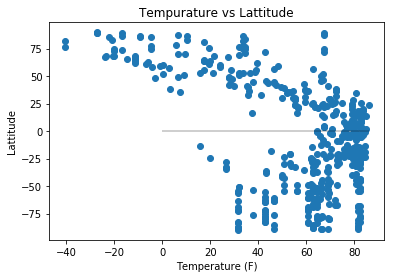

In [27]:
plt.scatter(weather_data['temp'], weather_data['lat'])
plt.xlabel('Temperature (F)')
plt.ylabel('Lattitude')
plt.title('Tempurature vs Lattitude')
plt.hlines(0, 0,max(temp), alpha=0.25)
plt.savefig("TempvLattitude.png")
plt.show()

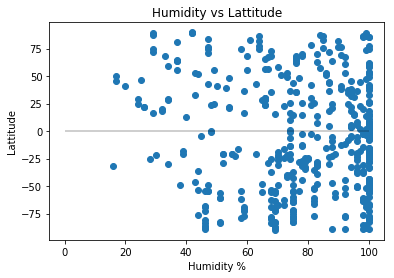

In [28]:
plt.scatter(weather_data['humidity'], weather_data['lat'])
plt.xlabel('Humidity %')
plt.ylabel('Lattitude')
plt.title('Humidity vs Lattitude')
plt.hlines(0, 0,max(humidity), alpha=0.25)
plt.savefig("HumidityvLat.png")
plt.show()

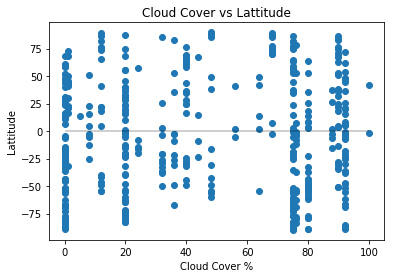

In [29]:
plt.scatter(weather_data['clouds'], weather_data['lat'])
plt.xlabel('Cloud Cover %')
plt.ylabel('Lattitude')
plt.title('Cloud Cover vs Lattitude')
plt.hlines(0, 0,max(clouds), alpha=0.25)
plt.savefig("CloudsvLattitude.png")
plt.show()


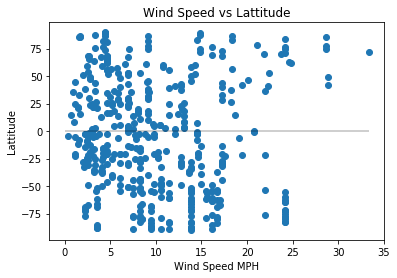

In [30]:
plt.scatter(weather_data['wind_speed'], weather_data['lat'])
plt.xlabel('Wind Speed MPH')
plt.ylabel('Lattitude')
plt.title('Wind Speed vs Lattitude')
plt.hlines(0, 0,max(wind_speed), alpha=0.25)
plt.savefig("WindvLattitude.png")
plt.show()


In [31]:
#Write DataFrame to csv file 
weather_data.to_csv("Output/weather_hw.csv", index=False, header=True)
    
